# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import make_pipeline

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = data = pd.read_csv ('df_train.csv', index_col = 0) # load the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.shape

(8763, 48)

In [3]:
df_test = pd.read_csv('df_test.csv', index_col = 0)
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [4]:
data.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

In [5]:
# plot relevant feature interactions


In [6]:
# evaluate correlation
corr = df.corr()
corr.style.background_gradient(cmap='Dark2')

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,-0.095380,0.230126,0.434104,0.062758,0.108413,0.071183,0.011134,0.004795,0.150446,-0.014644,0.021660,-0.169358,-0.099582,-0.231747,-0.120014,-0.157088,0.050043,-0.136672,0.133468,0.128726,-0.238128,0.090861,-0.285787,0.119657,0.061854,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,-0.030723,0.135524,0.140101,0.052558,0.092984,0.096730,0.052458,0.016392,0.187423,-0.001412,0.008269,-0.147768,-0.120618,-0.054814,-0.095723,-0.206765,-0.210323,-0.298587,-0.135198,-0.127953,-0.604616,-0.170009,-0.103868,-0.116835,-0.157326,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,-0.066071,0.221887,0.316035,0.031804,0.046085,0.115133,0.050282,0.027637,0.093865,-0.037553,0.058629,-0.099056,-0.037605,-0.096374,-0.069092,-0.041408,-0.024045,-0.158475,0.065815,0.072366,-0.201379,-0.008508,-0.413017,0.075533,-0.040998,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,0.164064,0.366602,-0.202449,-0.051022,0.227476,0.023556,0.021599,0.034343,0.164019,0.015555,0.007351,-0.228442,-0.050515,-0.099458,-0.328265,-0.088094,-0.566426,-0.103813,-0.650643,-0.663276,-0.105088,-0.743126,0.464012,-0.657427,-0.606770,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,0.183725,0.484293,-0.125680,-0.061265,0.195455,0.031653,0.025198,0.059958,0.250614,0.017797,0.012571,-0.341407,-0.051139,-0.053074,-0.291095,-0.168207,-0.576413,-0.121737,-0.705918,-0.706989,-0.139686,-0.738819,0.378980,-0.689854,-0.691803,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,-0.065120,0.109788,0.075066,0.052913,0.041090,0.080180,0.037506,0.009557,0.089281,-0.041013,0.024339,-0.080837,-0.124169,0.000377,-0.033825,-0.079778,-0.102322,-0.135672,0.002621,-0.000299,-0.536205,-0.095003,-0.129684,-0.003806,-0.034040,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,-0.018225,0.239326,0.213420,-0.026640,0.073080,-0.001642,0.009572,-0.026037,0.088502,-0.038246,-0.008114,-0.101497,-0.003074,-0.122915,-0.086691,0.054035,0.103342,0.075541,0.091352,0.093919,-0.031661,0.080357,-0.279825,0.093177,0.011151,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,-0.0

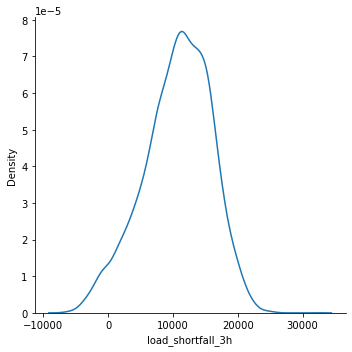

In [7]:
# have a look at feature distributions
sns.displot(df['load_shortfall_3h'], kind = "kde")
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [8]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)')
df['Valencia_wind_deg'] = pd.to_numeric(df['Valencia_wind_deg'])


In [9]:
df['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
5        7
6        8
7        9
8        9
9        9
10       9
11       9
12       7
13       7
14       8
15       9
16       8
17       8
18       8
19       9
20       8
21       8
22       9
23       9
24       9
25       9
26       9
27       8
28       6
29       4
30       6
31      10
32      10
33      10
34       9
35       7
36       6
37       9
38       9
39       9
40       9
41       7
42       4
43       3
44       7
45      10
46      10
47      10
48      10
49       8
50       6
51       5
52       7
53      10
54      10
55       9
56      10
57       7
58       6
59       7
60       7
61      10
62      10
63      10
64       9
65       8
66       8
67       8
68       8
69       8
70       9
71       9
72       9
73       8
74       9
75      10
76      10
77       8
78       8
79       9
80       9
81       8
82       6
83       3
84       6
85      10
86      10
87      10
88       6
89       5
90       6

In [10]:
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)')
df['Seville_pressure'] = pd.to_numeric(df['Seville_pressure'])
df['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
5       25
6       25
7       25
8       25
9       25
10      25
11      25
12      25
13      25
14      25
15      25
16      25
17      25
18      25
19      25
20      25
21      25
22      25
23      25
24      25
25      25
26      25
27      25
28      25
29      25
30      25
31      25
32      25
33      25
34      25
35      25
36      25
37      25
38      25
39      25
40      25
41      25
42      25
43      25
44      25
45      25
46      25
47      25
48      25
49      25
50      23
51      25
52      25
53      25
54      25
55      25
56      25
57      25
58      25
59      25
60      25
61      25
62      25
63      25
64      25
65      25
66      25
67      25
68      25
69      25
70      25
71      25
72      25
73      25
74      25
75      25
76      25
77      25
78      25
79      25
80      25
81      25
82      25
83      25
84      25
85      25
86      25
87      25
88      25
89      25
90      25

In [12]:
df['Valencia_pressure'] = df['Valencia_pressure'].fillna((df['Valencia_pressure'].mean()))
df['Valencia_pressure']

0       1002.666667
1       1004.333333
2       1005.333333
3       1009.000000
4       1012.051407
5       1012.051407
6       1006.000000
7       1005.666667
8       1005.333333
9       1006.333333
10      1007.000000
11      1021.666667
12      1012.051407
13      1021.333333
14      1007.000000
15      1006.666667
16      1005.666667
17      1005.333333
18      1005.666667
19      1005.000000
20      1015.000000
21      1012.666667
22      1003.000000
23      1002.666667
24      1002.000000
25      1002.333333
26      1003.000000
27      1002.000000
28      1001.000000
29      1002.333333
30      1013.000000
31      1003.000000
32      1002.666667
33      1002.000000
34      1001.333333
35      1000.000000
36       997.666667
37       995.666667
38       995.000000
39       995.000000
40       995.000000
41       994.333333
42       994.666667
43       995.666667
44      1001.666667
45       997.333333
46       998.000000
47      1008.333333
48      1018.666667
49      1012.333333


In [42]:
# remove missing values/ features

In [16]:
# create new features
y = df['load_shortfall_3h']
X = df.drop(['load_shortfall_3h','time'], axis= 1)

In [17]:
# engineer existing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,1.932284,-1.660205,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.057269,-0.024277,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,-1.756232,-2.835227,-2.890888,0.649842,-2.490266,0.540928,-2.892663,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,0.630270,-0.578686,-0.694188,0.542975,-0.203099,1.588087,-0.224278,-0.057269,-0.024206,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,-1.696165,-2.591966,-2.633926,0.649842,-2.403108,0.298645,-2.626219,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,-0.485743,1.520733,-0.694188,0.144442,-0.203099,1.588087,-0.224278,-0.057269,-0.024158,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,-1.636097,-1.761812,-1.757012,0.649842,-1.917409,0.021750,-1.716949,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,-0.299741,0.925711,-0.694188,0.941509,-0.203099,1.588087,-0.224278,-0.057269,-0.024229,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,-0.705052,-0.850953,-0.794849,0.649842,-1.083879,-0.583957,-0.719283,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,0.816272,0.779762,-0.694188,0.343708,-0.203099,1.588087,-0.224278,-0.057269,-0.024372,-0.066278,-0.247776,-0.110037,-0.017312,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,1.127003,-1.100044,-1.057970,0.649842,-1.068764,-0.358980,-0.992113,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [61]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3332)

In [62]:
# create targets and features dataset
X_test.shape

(2920, 46)

In [86]:
# create one or more ML models
#Linear Regression Model

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred_ln = lm.predict(X_test)

mse = mean_squared_error(y_test,y_pred_ln)
rmse = np.sqrt(mse)
print("Linear Regression: ",rmse)



Linear Regression:  4903.185957910716


In [72]:
y_pred_ln

array([12372.78315075, 11308.50380273, 11075.28087927, ...,
        8641.02607176, 13069.14801618,  8232.78850619])

In [79]:
submission = pd.DataFrame()
submission['time'] = df_test['time']
submission['load_shortfall_3h'] = y_pred_ln.shape[0]
submission.head()

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,1753
8764,2018-01-01 03:00:00,1753
8765,2018-01-01 06:00:00,1753
8766,2018-01-01 09:00:00,1753
8767,2018-01-01 12:00:00,1753


In [48]:
#Ridge Regression Model

rdg = Ridge()
rdg.fit(X_train,y_train)

y_pred_rdg = rdg.predict(X_test)

mse_rdg = mean_squared_error(y_test,y_pred_rdg)
rmse_rdg = np.sqrt(mse)
print("Ridge: ",rmse_rdg)

Ridge:  4903.185957910716


In [49]:
#Lasso Regression Model

lss = Lasso()
lss.fit(X_train,y_train)

y_pred_lss = lss.predict(X_test)

mse_lss = mean_squared_error(y_test,y_pred_lss)
rmse_lss = np.sqrt(mse)
print("Lasso :",rmse_lss)

Lasso : 4903.185957910716


C:\Users\Mfundo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28640193387.896782, tolerance: 18920111.28453077
  model = cd_fast.enet_coordinate_descent(


In [50]:
#Random Forest Regression Model

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

mse_rfr = mean_squared_error(y_test,y_pred_rfr)
rmse_rfr = np.sqrt(mse)
print("RandomForestRegressor: ",rmse_rfr)

RandomForestRegressor:  4903.185957910716


In [63]:
#XGBoost Model

reg = xgb.XGBRegressor(booster='gbtree',n_estimators = 2000, reg_lambda=1,gamma=0, max_depth = 3)
reg.fit(X_train, y_train)

y_pred_xgb = reg.predict(X_test)

mse_xgb = mean_squared_error(y_test,y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST: ",rmse_xgb)



XGBOOST:  4596.3008072832445


In [21]:
daf = pd.DataFrame(y_pred_xgb, columns = ['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,13568.827148
1,12276.981445
2,15872.289062
3,2105.791260
4,10407.875000


In [64]:
y_pred_xgb.shape

(2920,)

In [65]:
submission = pd.DataFrame()
submission['time'] = df_test['time']
submission['load_shortfall_3h'] =y_pred_xgb
submission.to_csv('Mfundo_sub.')

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,14758.595703
8764,2018-01-01 03:00:00,12345.801758
8765,2018-01-01 06:00:00,7547.755371
8766,2018-01-01 09:00:00,16205.157227
8767,2018-01-01 12:00:00,13833.643555


In [57]:
submission

,time,load_shortfall_3h
8763,2018-01-01 00:00:00,1753
8764,2018-01-01 03:00:00,1753
8765,2018-01-01 06:00:00,1753
8766,2018-01-01 09:00:00,1753
8767,2018-01-01 12:00:00,1753
8768,2018-01-01 15:00:00,1753
8769,2018-01-01 18:00:00,1753
8770,2018-01-01 21:00:00,1753
8771,2018-01-02 00:00:00,1753
8772,2018-01-02 03:00:00,1753


In [ ]:
submission.to_csv('Mfundo_submission.csv', index=False)


In [17]:
# evaluate one or more ML models


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [18]:
# Compare model performance


In [19]:
# Choose best model and motivate why it is the best choice


In [43]:
test = pd.read_csv('df_test.csv', index_col = 0)

In [44]:
test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic